In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import cufflinks as cf
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode

In [4]:
init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
df = pd.read_csv('adidas.csv')

In [4]:
df.head()

,Unnamed: 0,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,0,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,1,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,2,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,3,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,4,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [5]:
df.shape

(9648, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        9648 non-null   int64  
 1   Retailer          9648 non-null   object 
 2   Retailer ID       9648 non-null   int64  
 3   Invoice Date      9648 non-null   object 
 4   Region            9648 non-null   object 
 5   State             9648 non-null   object 
 6   City              9648 non-null   object 
 7   Product           9648 non-null   object 
 8   Price per Unit    9648 non-null   float64
 9   Units Sold        9648 non-null   int64  
 10  Total Sales       9648 non-null   float64
 11  Operating Profit  9648 non-null   float64
 12  Operating Margin  9648 non-null   float64
 13  Sales Method      9648 non-null   object 
dtypes: float64(4), int64(3), object(7)
memory usage: 1.0+ MB


In [7]:
df.describe()

,Unnamed: 0,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,9648.000000,9.648000e+03,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,4823.500000,1.173850e+06,45.216625,256.930037,93273.437500,34425.244761,0.422991
std,2785.282032,2.636038e+04,14.705397,214.252030,141916.016727,54193.113713,0.097197
min,0.000000,1.128299e+06,7.000000,0.000000,0.000000,0.000000,0.100000
25%,2411.750000,1.185732e+06,35.000000,106.000000,4254.500000,1921.752500,0.350000
50%,4823.500000,1.185732e+06,45.000000,176.000000,9576.000000,4371.420000,0.410000
75%,7235.250000,1.185732e+06,55.000000,350.000000,150000.000000,52062.500000,0.490000
max,9647.000000,1.197831e+06,110.000000,1275.000000,825000.000000,390000.000000,0.800000


In [8]:
df.isna().sum()

Unnamed: 0          0
Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.drop(columns='Unnamed: 0', inplace=True)

In [11]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [12]:
sns.set_style('darkgrid')

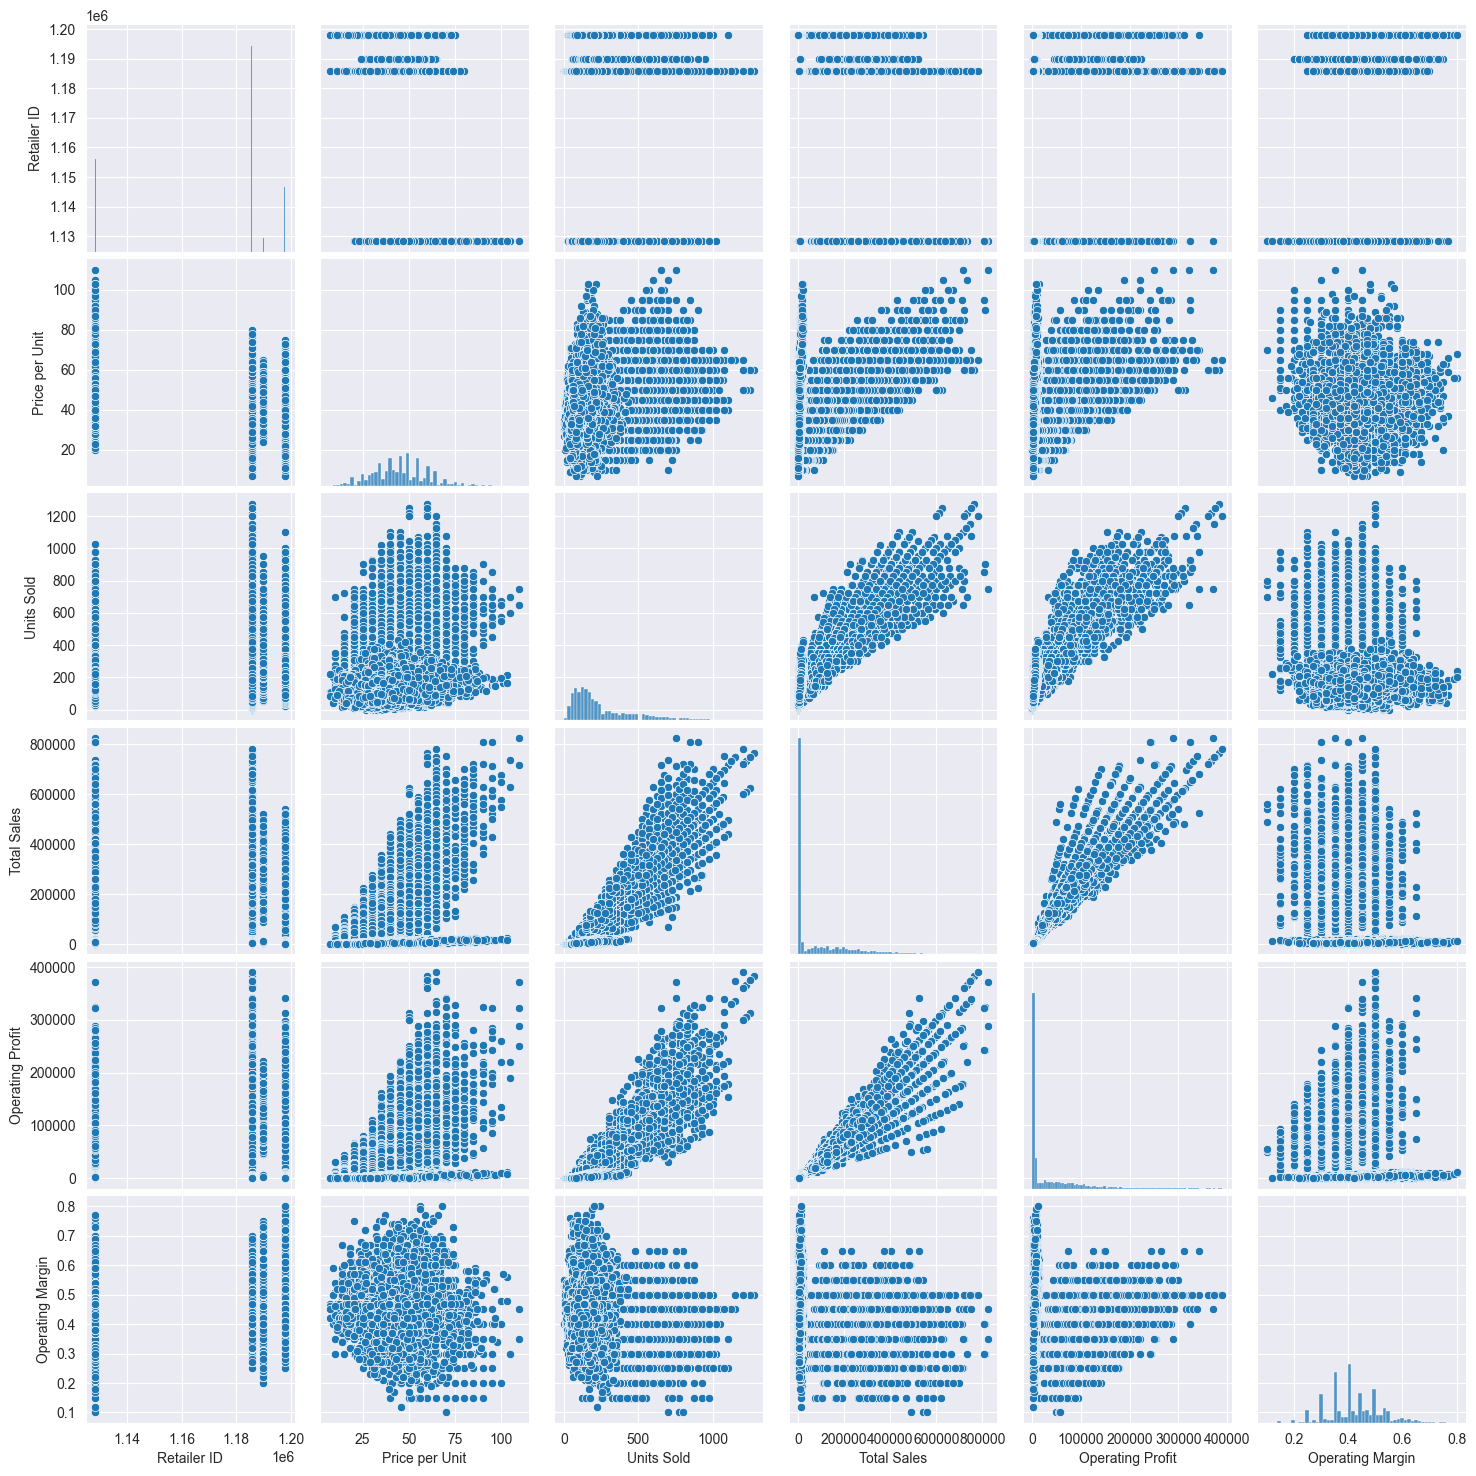

In [13]:
sns.pairplot(df)

In [14]:
corr = df.corr(numeric_only=True)

In [15]:
corr

,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
Retailer ID,1.000000,-0.391684,-0.003194,-0.083580,-0.027137,0.216780
Price per Unit,-0.391684,1.000000,0.265869,0.435811,0.394546,-0.137486
Units Sold,-0.003194,0.265869,1.000000,0.913431,0.892379,-0.305479
Total Sales,-0.083580,0.435811,0.913431,1.000000,0.956307,-0.364592
Operating Profit,-0.027137,0.394546,0.892379,0.956307,1.000000,-0.211920
Operating Margin,0.216780,-0.137486,-0.305479,-0.364592,-0.211920,1.000000


<Axes: >

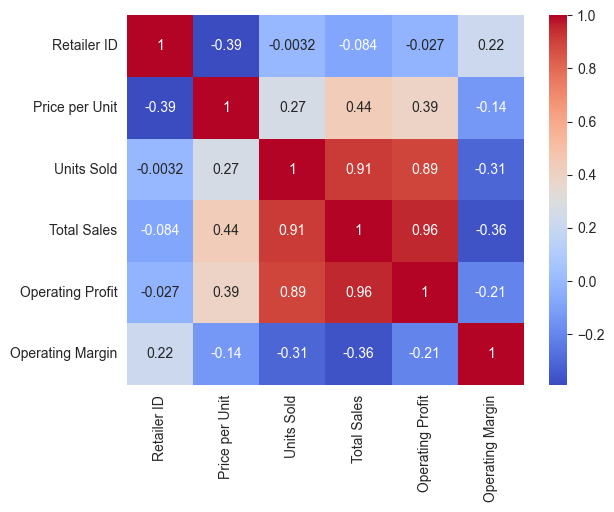

In [18]:
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [20]:
df.corr(numeric_only=True)['Total Sales']

Retailer ID        -0.083580
Price per Unit      0.435811
Units Sold          0.913431
Total Sales         1.000000
Operating Profit    0.956307
Operating Margin   -0.364592
Name: Total Sales, dtype: float64

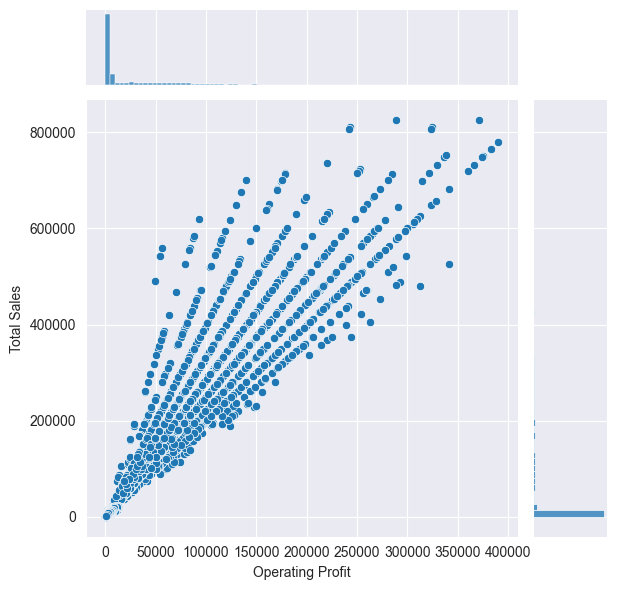

In [22]:
sns.jointplot(df,x='Operating Profit',y='Total Sales')

In [24]:
s_method = df.groupby('Sales Method')['Total Sales'].sum()

In [25]:
s_method

Sales Method
In-store    356643750.0
Online      247672882.0
Outlet      295585493.0
Name: Total Sales, dtype: float64

In [26]:
px.bar(s_method)

In [37]:
product_sales = df.groupby('Product')['Total Sales'].mean()

In [38]:
product_sales

Product
Men's Apparel                 77041.489415
Men's Athletic Footwear       95449.490683
Men's Street Footwear        129705.741615
Women's Apparel              111342.574627
Women's Athletic Footwear     66395.950187
Women's Street Footwear       79603.739428
Name: Total Sales, dtype: float64

In [57]:
px.bar(product_sales.sort_values())

In [45]:
product_profit = df.groupby('Product')['Operating Profit'].sum()

In [46]:
product_profit

Product
Men's Apparel                44763030.33
Men's Athletic Footwear      51846888.19
Men's Street Footwear        82802260.62
Women's Apparel              68650970.56
Women's Athletic Footwear    38975784.94
Women's Street Footwear      45095826.81
Name: Operating Profit, dtype: float64

In [53]:
px.bar(product_profit.sort_values())

In [72]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [80]:
us_state_abbrev = {
    "Alabama": "AL", "Alaska": "AK", "Arizona": "AZ", "Arkansas": "AR", "California": "CA", "Colorado": "CO",
    "Connecticut": "CT", "Delaware": "DE", "Florida": "FL", "Georgia": "GA", "Hawaii": "HI", "Idaho": "ID",
    "Illinois": "IL", "Indiana": "IN", "Iowa": "IA", "Kansas": "KS", "Kentucky": "KY", "Louisiana": "LA",
    "Maine": "ME", "Maryland": "MD", "Massachusetts": "MA", "Michigan": "MI", "Minnesota": "MN", "Mississippi": "MS",
    "Missouri": "MO", "Montana": "MT", "Nebraska": "NE", "Nevada": "NV", "New Hampshire": "NH", "New Jersey": "NJ",
    "New Mexico": "NM", "New York": "NY", "North Carolina": "NC", "North Dakota": "ND", "Ohio": "OH", "Oklahoma": "OK",
    "Oregon": "OR", "Pennsylvania": "PA", "Rhode Island": "RI", "South Carolina": "SC", "South Dakota": "SD",
    "Tennessee": "TN", "Texas": "TX", "Utah": "UT", "Vermont": "VT", "Virginia": "VA", "Washington": "WA",
    "West Virginia": "WV", "Wisconsin": "WI", "Wyoming": "WY", "District of Columbia": "DC"
}

In [81]:
df['State Code'] = df['State'].map(us_state_abbrev)

In [82]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,State Code
0,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store,NY
1,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store,NY
2,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store,NY
3,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store,NY
4,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store,NY


In [96]:
state_sales = df.groupby(['State Code','State'])['Total Sales'].sum().reset_index()

In [102]:
state_sales.head()

,State Code,State,Total Sales
0,AK,Alaska,14753103.0
1,AL,Alabama,17633424.0
2,AR,Arkansas,12639347.0
3,AZ,Arizona,15782221.0
4,CA,California,60174133.0


In [111]:
fig = px.choropleth(
    state_sales,
    locations='State Code',
    locationmode='USA-states',
    color='Total Sales',
    scope='usa',
    title='Total Sales Per State',
    hover_name='State',
)
fig.show()

In [113]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,State Code
0,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store,NY
1,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store,NY
2,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store,NY
3,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store,NY
4,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store,NY


In [127]:
df.groupby('Region')[['Total Sales', 'Operating Profit']].sum()

,Total Sales,Operating Profit
Region,,
Midwest,135800459.0,52811346.48
Northeast,186324067.0,68020587.65
South,144663181.0,61138004.07
Southeast,163171236.0,60555416.70
West,269943182.0,89609406.55


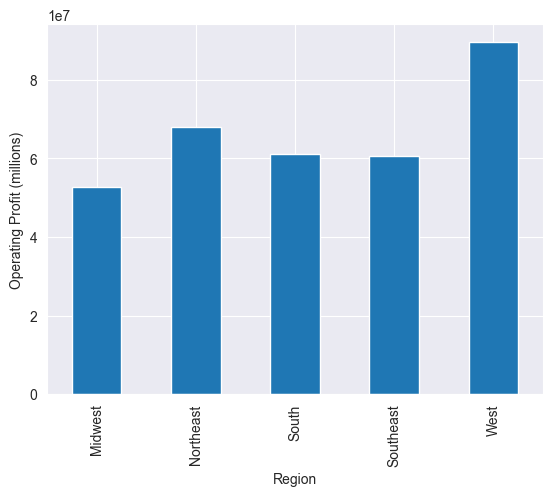

In [129]:
df.groupby('Region')['Operating Profit'].sum().plot(kind='bar')
plt.ylabel('Operating Profit (millions)')
plt.show()

### Feature Engineering

In [130]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,State Code
0,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store,NY
1,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store,NY
2,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store,NY
3,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store,NY
4,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store,NY


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Retailer          9648 non-null   object 
 1   Retailer ID       9648 non-null   int64  
 2   Invoice Date      9648 non-null   object 
 3   Region            9648 non-null   object 
 4   State             9648 non-null   object 
 5   City              9648 non-null   object 
 6   Product           9648 non-null   object 
 7   Price per Unit    9648 non-null   float64
 8   Units Sold        9648 non-null   int64  
 9   Total Sales       9648 non-null   float64
 10  Operating Profit  9648 non-null   float64
 11  Operating Margin  9648 non-null   float64
 12  Sales Method      9648 non-null   object 
 13  State Code        9648 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 1.0+ MB


In [132]:
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])

In [135]:
df['Invoice Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9648 entries, 0 to 9647
Series name: Invoice Date
Non-Null Count  Dtype         
--------------  -----         
9648 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 75.5 KB


In [139]:
df['Month'] = df['Invoice Date'].apply(lambda month: month.month)

In [144]:
df['Year'] = df['Invoice Date'].apply(lambda year: year.year)

In [145]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,State Code,Month,Year
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store,NY,1,2020
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store,NY,1,2020
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store,NY,1,2020
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store,NY,1,2020
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store,NY,1,2020


In [146]:
df['Month'].value_counts()

Month
1     861
8     853
4     841
9     824
5     820
10    814
3     802
11    795
2     776
7     774
12    759
6     729
Name: count, dtype: int64

In [147]:
df['Year'].value_counts()

Year
2021    8346
2020    1302
Name: count, dtype: int64

In [156]:
df.groupby('Month')['Total Sales'].sum().sort_values()

Month
3     56809109.0
2     61100153.0
10    63911033.0
11    67857340.0
1     71479142.0
4     72339970.0
6     74747372.0
9     77661459.0
5     80507695.0
12    85841957.0
8     92166201.0
7     95480694.0
Name: Total Sales, dtype: float64

Text(0, 0.5, 'Total Sales (millions)')

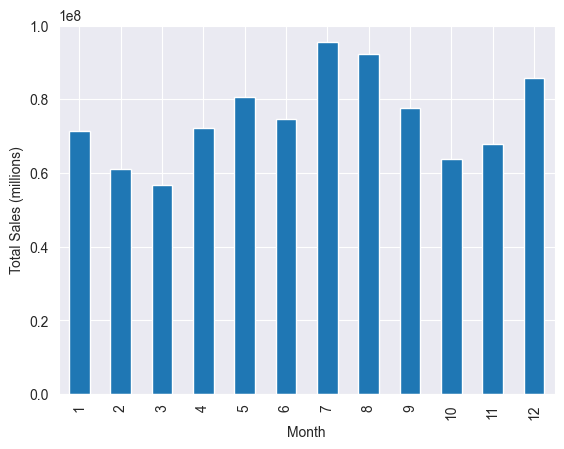

In [157]:
df.groupby('Month')['Total Sales'].sum().plot(kind='bar')
plt.ylabel('Total Sales (millions)')

In [183]:
px.box(df,x='Sales Method',y='Units Sold')

<Axes: xlabel='Sales Method', ylabel='count'>

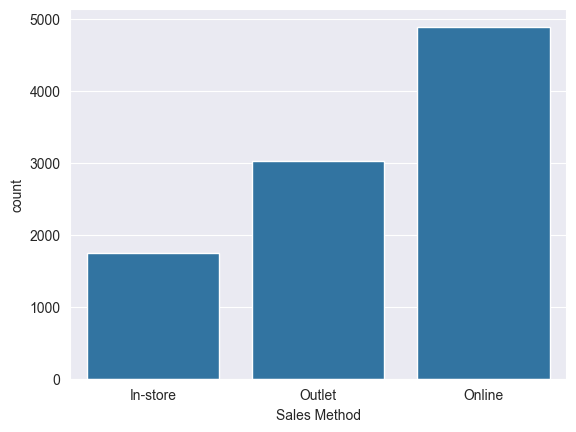

In [187]:
sns.countplot(df,x='Sales Method')

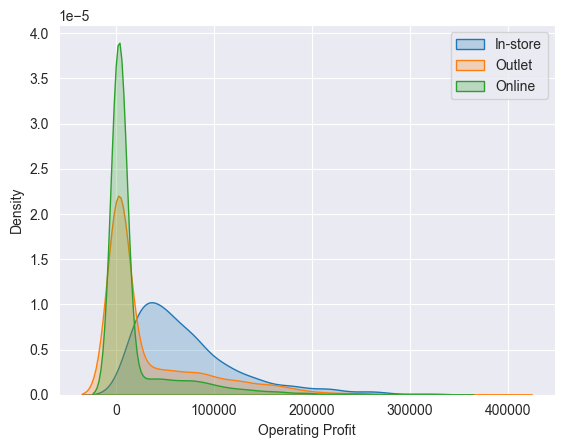

In [190]:
sns.kdeplot(df[df['Sales Method'] == 'In-store'], x='Operating Profit',fill=True,label='In-store')
sns.kdeplot(df[df['Sales Method'] == 'Outlet'], x='Operating Profit',fill=True,label='Outlet')
sns.kdeplot(df[df['Sales Method'] == 'Online'], x='Operating Profit',fill=True,label='Online')
plt.legend()

In [193]:
sales_method = pd.get_dummies(df['Sales Method'],dtype=int,drop_first=True)

In [194]:
df = pd.concat([df,sales_method],axis=1)

In [195]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,State Code,Month,Year,Online,Outlet
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store,NY,1,2020,0,0
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store,NY,1,2020,0,0
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store,NY,1,2020,0,0
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store,NY,1,2020,0,0
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store,NY,1,2020,0,0


In [196]:
df['Product'].value_counts()

Product
Men's Street Footwear        1610
Men's Athletic Footwear      1610
Women's Street Footwear      1608
Women's Apparel              1608
Women's Athletic Footwear    1606
Men's Apparel                1606
Name: count, dtype: int64

In [ ]:
df['Region'].value_counts()

Region
West         2448
Northeast    2376
Midwest      1872
South        1728
Southeast    1224
Name: count, dtype: int64

In [201]:
dta = pd.get_dummies(df[['Product','Region']],dtype=int,drop_first=True)

In [202]:
df = pd.concat([df,dta],axis=1)

In [203]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,...,Outlet,Product_Men's Athletic Footwear,Product_Men's Street Footwear,Product_Women's Apparel,Product_Women's Athletic Footwear,Product_Women's Street Footwear,Region_Northeast,Region_South,Region_Southeast,Region_West
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,...,0,0,1,0,0,0,1,0,0,0
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,...,0,1,0,0,0,0,1,0,0,0
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,...,0,0,0,0,0,1,1,0,0,0
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,...,0,0,0,0,1,0,1,0,0,0
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,...,0,0,0,0,0,0,1,0,0,0


In [205]:
df['Retailer'].value_counts()

Retailer
Foot Locker      2637
West Gear        2374
Sports Direct    2032
Kohl's           1030
Amazon            949
Walmart           626
Name: count, dtype: int64

In [208]:
retail = pd.get_dummies(df['Retailer'],dtype=int,drop_first=True)

In [209]:
df = pd.concat([df,retail],axis=1)

In [210]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,...,Product_Women's Street Footwear,Region_Northeast,Region_South,Region_Southeast,Region_West,Foot Locker,Kohl's,Sports Direct,Walmart,West Gear
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,...,0,1,0,0,0,1,0,0,0,0
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,...,0,1,0,0,0,1,0,0,0,0
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,...,1,1,0,0,0,1,0,0,0,0
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,...,0,1,0,0,0,1,0,0,0,0
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,...,0,1,0,0,0,1,0,0,0,0


### Train Test Split

In [204]:
from sklearn.model_selection import train_test_split

In [215]:
X = df.drop(columns=['Retailer','Retailer ID','Region','State','City','Product','Operating Profit','Sales Method','State Code','Invoice Date'])
y = df['Operating Profit']

In [218]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [219]:
from sklearn.preprocessing import MinMaxScaler

In [220]:
scaler = MinMaxScaler()

In [221]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [223]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [224]:
model = Sequential()
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='linear'))

model.compile(optimizer='adam',loss='mse')

In [225]:
model.fit(X_train,y_train,
          epochs=200,
          batch_size=32,
          validation_split = 0.2,
          verbose=1)

Epoch 1/200
169/169 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 4211496192.0000 - val_loss: 3625790208.0000
Epoch 2/200
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4164056064.0000 - val_loss: 3532749824.0000
Epoch 3/200
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3984399616.0000 - val_loss: 3297705216.0000
Epoch 4/200
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3659255296.0000 - val_loss: 2963006720.0000
Epoch 5/200
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3283662848.0000 - val_loss: 2664579072.0000
Epoch 6/200
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3000542720.0000 - val_loss: 2497556992.0000
Epoch 7/200
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2841504000.0000 - val_loss: 2416602112.0000
Epoch 8/200
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2755986432.0000 - val_loss: 2367202304.0000
Epoch 9/200
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2694518016.0000 - val_loss: 2320157184.0000
Epoch 10/200
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step -

In [226]:
loss = pd.DataFrame(model.history.history)

<Axes: >

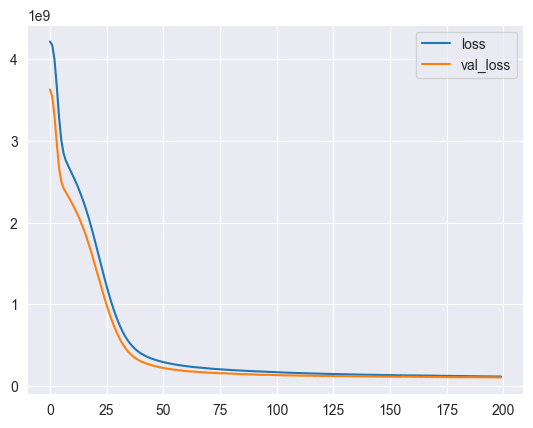

In [227]:
loss.plot()

In [228]:
from sklearn.metrics import r2_score

In [229]:
pred = model.predict(X_test)

91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


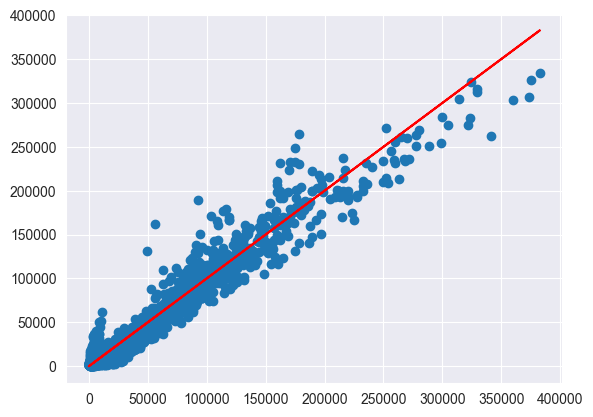

In [233]:
plt.scatter(y_test,pred)
plt.plot(y_test,y_test,'r')

In [230]:
r2_score(y_test,pred)

0.9558252226926529